In [8]:
import imblearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json # to save preprocessing details
import joblib #to save ML objects
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
filepath = r"C:\Users\hp\Downloads\applicationlayer-ddos-dataset\train_mosaic.csv"
data = pd.read_csv(filepath)
data.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,101168794,20,1,969,0,353,0,48.450000,119.083551,...,0.0,739228.5,743103.4661,1264682.0,213775.0,49700000.0,41400000.0,79000000.0,20500000.0,DoS Hulk
1,60711,58,1,1,0,0,0,0,0.000000,0.000000,...,32.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,53,31146,4,2,148,244,37,37,37.000000,0.000000,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,80,254704,3,4,429,389,423,0,143.000000,242.505670,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,443,11932077,12,16,5030,15703,1525,0,419.166667,644.896586,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [12]:
data.shape

(809361, 78)

In [13]:
data[pd.isnull(data.Label)]

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label


In [15]:
data.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
809356    False
809357    False
809358    False
809359    False
809360    False
Length: 809361, dtype: bool

In [4]:
X= data.drop('Label', axis = 1) #features matrix
y= data['Label'] #target array

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [6]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
et = ExtraTreesClassifier(n_estimators = 100)
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [28]:
rf_model = rf.predict(X_test)
et_model = et.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(rf_model, y_test))
print(accuracy_score(et_model, y_test))

0.9999629338286472
0.9999382230477454


In [30]:
from sklearn.metrics import precision_score
print(precision_score(rf_model, y_test, average = 'macro'))
print(precision_score(et_model, y_test, average = 'macro'))

0.9999526228414014
0.9999109424982794


In [31]:
from sklearn.metrics import recall_score
print(recall_score(rf_model, y_test, average ='macro'))
print(recall_score(et_model, y_test, average ='macro'))

0.9999374831597722
0.9999058962306573


In [44]:
from sklearn.metrics import roc_auc_score


In [42]:
from sklearn.metrics import f1_score
print(f1_score(rf_model, y_test, average='macro'))
print(f1_score(et_model, y_test, average='macro'))

0.9999450524114613
0.9999084192990119


Text(33.0, 0.5, 'true value')

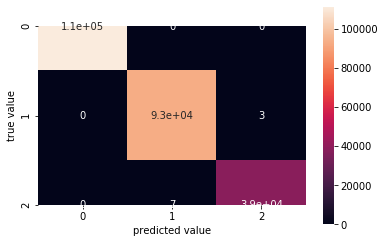

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
mat = confusion_matrix(rf_model, y_test)
sns.heatmap(mat, square = True, annot = True, cbar =True)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [30]:
#plotting a learning curve for the random forest classifier
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(rf, X, y, train_sizes = [10, 100, 250],cv =5)

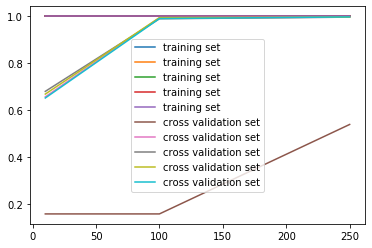

In [32]:
plt.plot(train_sizes, train_scores, label = 'training set')
plt.plot(train_sizes, valid_scores, label = 'cross validation set')
plt.legend()

In [ ]:
#plotting a learning curve for the extra trees classifier
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(et, X, y, train_sizes = [10, 100, 250],cv =5)

In [33]:
train_sizes

array([ 10, 100, 250])

In [34]:
train_scores

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [35]:
valid_scores

array([[0.15890755, 0.65690387, 0.68037091, 0.66870533, 0.65209951],
       [0.15890755, 0.99368641, 0.98920134, 0.99407553, 0.9901403 ],
       [0.53956163, 0.99589184, 0.99618217, 0.99604623, 0.99710263]])

In [36]:
path = r"C:\Users\hp\Downloads\applicationlayer-ddos-dataset\test_mosaic.csv"
test = pd.read_csv(path)
test.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,53,87750,2,2,72,264,36,36,36.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
1,53,31073,4,4,120,232,30,30,30.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
2,80,41125329,8,1,387,0,188,0,48.375000,80.505435,...,0.0,1218262.0,0.0,1218262.0,1218262.0,37178044.0,0.00,37178044.0,37178044.0,DoS slowloris
3,53,40633,4,4,140,508,35,35,35.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
4,80,41920705,7,1,211,0,168,0,30.142857,61.300975,...,0.0,2611.0,0.0,2611.0,2611.0,19711185.0,2319322.97,21351194.0,18071176.0,DoS slowloris


In [15]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5)
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced

In [13]:
undersample_x=data.drop(['Label'],axis=1)
undersample_y=data['Label']
for train_index,test_index in skf.split(undersample_x,undersample_y):
    undersample_xtrain,undersample_xtest=undersample_x.iloc[train_index],undersample_x.iloc[test_index]
    undersample_ytrain,undersample_ytest=undersample_y.iloc[train_index],undersample_y.iloc[test_index]
undersample_xtrain=undersample_xtrain.values
undersample_ytrain=undersample_ytrain.values
undersample_xtest=undersample_xtest.values
undersample_ytest=undersample_ytest.values
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

In [20]:
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
classifiers={'LogisticRegression':LogisticRegression(),
            'DecisionTree':DecisionTreeClassifier(),
            'SVC':SVC(),
            'KNeigbor':KNeighborsClassifier(),
            'RandomForest':RandomForestClassifier(),
            'Bayes':GaussianNB()}

In [37]:
for train_index,test_index in skf.split(X,y):
    original_xtrain,original_xtest=X.iloc[train_index],X.iloc[test_index]
    original_ytrain,original_ytest=y.iloc[train_index],y.iloc[test_index]
    
original_xtrain=original_xtrain.values
original_xtest=original_xtest.values
original_ytrain=original_ytrain.values
original_ytest=original_ytest.values

In [45]:
for train,test in skf.split(undersample_xtrain,undersample_ytrain):
    undersample_pipeline=imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'),classifiers['LogisticRegression']
                                                 )
    undersample_model=undersample_pipeline.fit(undersample_xtrain[train],undersample_ytrain[train])
    
    undersample_prediction=undersample_model.predict(undersample_xtrain[test])
    
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction,average = 'macro'))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction,average = 'macro'))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction,average = 'macro'))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction,average = 'macro'))
    undersample_accuracy.append(undersample_pipeline.score(original_xtrain[test], original_ytrain[test],average = 'macro'))

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ValueError: could not convert string to float: 'DoS Hulk'

In [49]:
undersample_f1

[0.8447379551400891, 0.8447379551400891, 0.8447379551400891]